In [25]:
from pprint import pprint
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from draco.learn import data_util

import warnings; warnings.simplefilter('ignore')

In [26]:
# loading train dev data
data, _ = data_util.load_data(test_size=0.3)
X = data.positive - data.negative
N = len(X)
y = np.ones(N)

idx = np.ones(N, dtype=bool)
idx[:int(N/2)] = False
np.random.shuffle(idx)

X[idx] = -X[idx]
y[idx] = -y[idx]

In [27]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=1)

clf = svm.LinearSVC(C=1, fit_intercept=False)
clf.fit(X_train, y_train)

print("Train score: ", clf.score(X_train, y_train))
print("Dev score: ", clf.score(X_dev, np.ones(len(X_dev))))

Train score:  0.621247113164
Dev score:  0.456989247312


In [30]:
clf.intercept_

0.0

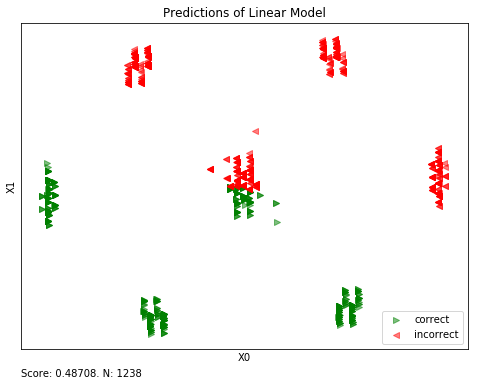

In [31]:
# for plotting
X0, X1 = X[:, 0], X[:, 1]
xx, yy = linear.make_meshgrid(X0, X1)

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

f, ax = plt.subplots(figsize=(8,6))

# predictions made by the model
pred = clf.predict(X)

correct = (pred > 0)

plt.scatter(X0[correct], X1[correct], c='g', cmap=cm_bright, alpha=0.5, marker='>', label='correct')
plt.scatter(X0[~correct], X1[~correct], c='r', cmap=cm_bright, alpha=0.5, marker='<', label='incorrect')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_xlabel('X0')
ax.set_ylabel('X1')

ax.set_xticks(())
ax.set_yticks(())

plt.title("Predictions of Linear Model")

plt.annotate(f'Score: {clf.score(X, np.ones(len(X))):.{5}}. N: {int(len(data))}', (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top')

plt.legend(loc='lower right')
plt.axis("tight")

plt.show()